# Time Series and Forecasting Laboratory
# Name: Atharva Girish Mahakalkar
# Roll No: 56
Experiment No 8: Implementation of Modelling time series Moving average , Exponential smoothing , ARIMA.
Maximum Marks: 10
Understand ARIMA Parameters
Implement ARIMA model and evaluate ARIMA Model Performance

In [23]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import plotly.express as px

In [24]:
data  = pd.read_csv("website_data.csv")

In [25]:
data


,traffic
0,932
1,929
2,938
3,964
4,990
...,...
388,4667
389,4701
390,4721
391,4757


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


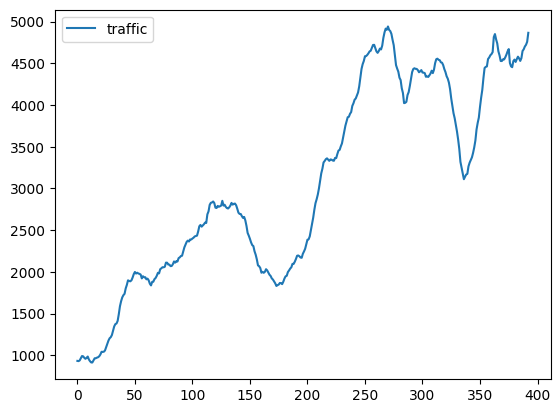

In [26]:
data.plot()
data.info()

<AxesSubplot: >

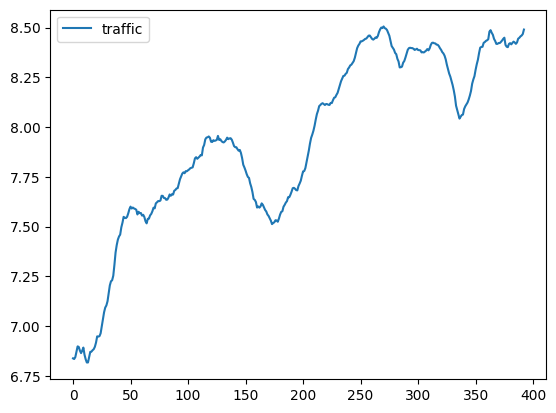

In [27]:
df = np.log(data)
df.plot()

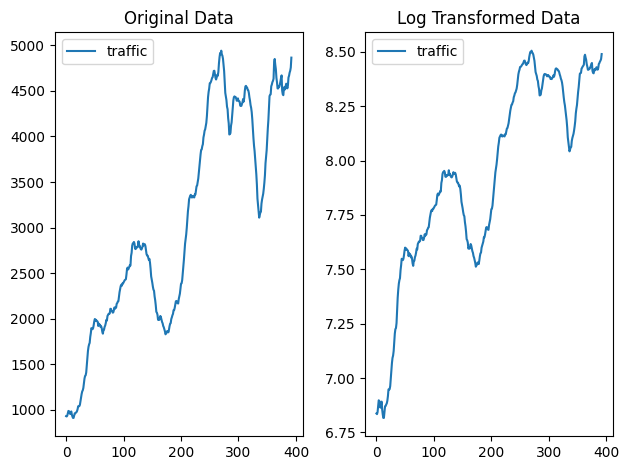

In [28]:
# prompt: put both df log and plot in one graph

fig, axes = plt.subplots(1, 2)
data.plot(ax=axes[0])
axes[0].set_title("Original Data")
df.plot(ax=axes[1])
axes[1].set_title("Log Transformed Data")
plt.tight_layout()
plt.show()


In [29]:
msk = (data.index < len(df)-30)
data_train = data[msk].copy()
data_test = data[~msk].copy()

C:\Users\hmpat\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


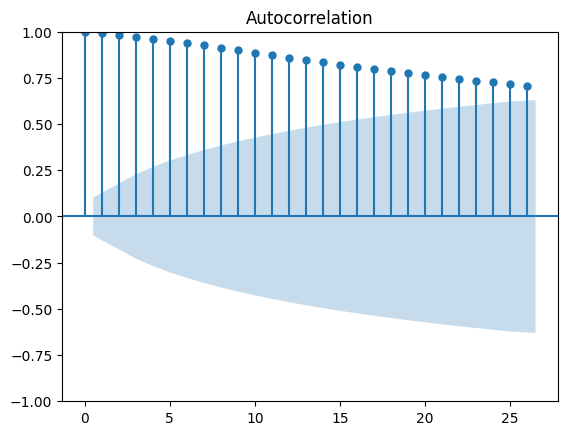

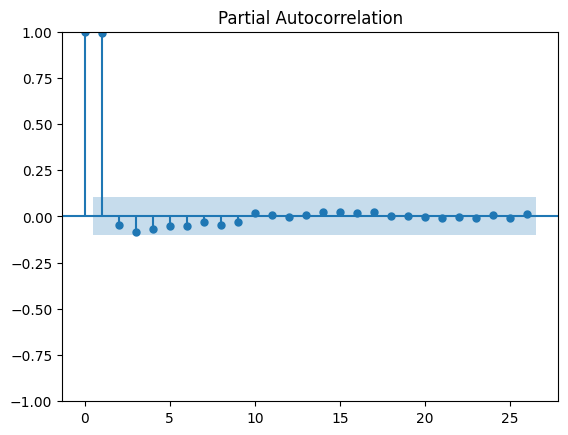

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_orignal = plot_acf(data_train)
pacf_orignal = plot_pacf(data_train)

In [31]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_train)
print(f'p-value : {adf_test[1]}')

p-value : 0.7405733253695602


<AxesSubplot: >

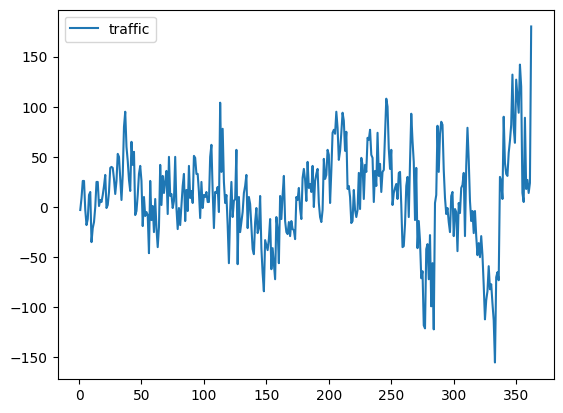

In [32]:
data_train_diff = data_train.diff().dropna()
data_train_diff.plot()

C:\Users\hmpat\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


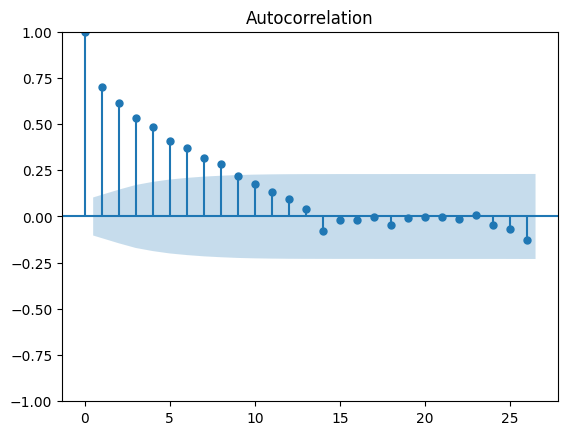

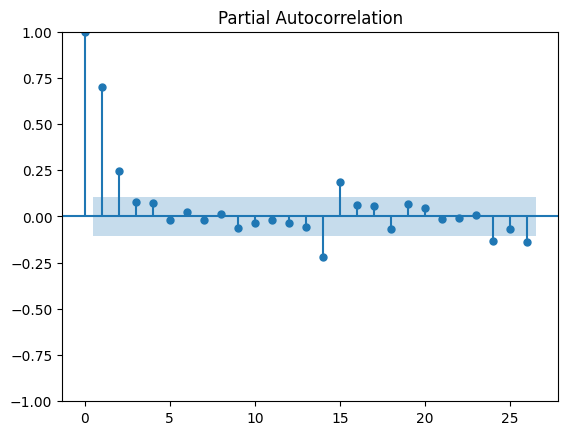

In [33]:
acf_diff = plot_acf(data_train_diff)

pacf_diff = plot_pacf(data_train_diff)

In [34]:
adf_test = adfuller(data_train_diff)
print(f'p-value : {adf_test[1]}')

p-value : 0.05439760671693651


In [35]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  363
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1758.050
Date:                Sun, 28 Apr 2024   AIC                           3522.101
Time:                        20:04:46   BIC                           3533.776
Sample:                             0   HQIC                          3526.742
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5620      0.052     10.868      0.000       0.461       0.663
ar.L2          0.2423      0.054      4.447      0.000       0.135       0.349
sigma2       965.4265     50.414     19.150      0.0

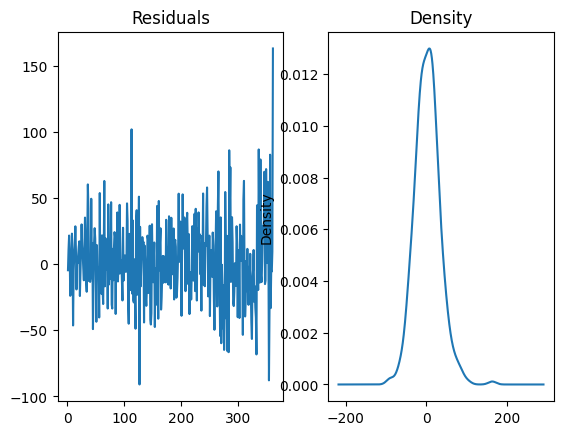

In [36]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

C:\Users\hmpat\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


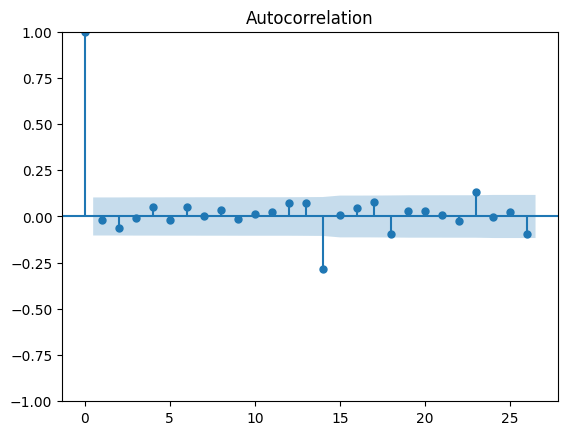

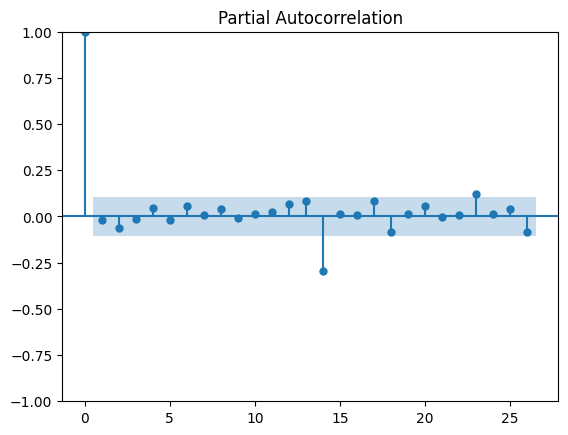

In [37]:

acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<AxesSubplot: >

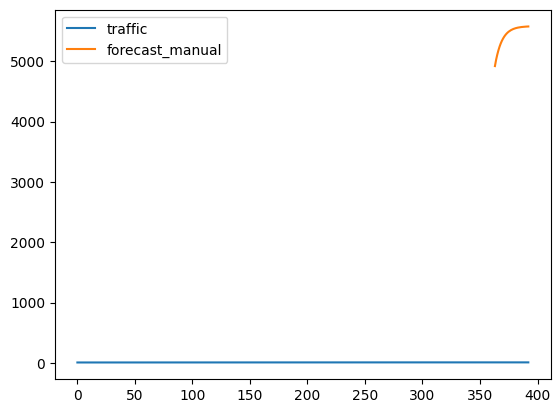

In [38]:
forecast_test = model_fit.forecast(len(data_test))

df['forecast_manual'] = [None]*len(data_train) + list(forecast_test)
df.plot()